In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import missingno as msno
from functions import *
import seaborn as sns
from scipy import stats

# Data Cleaning pt.1

### Read in the CSV and review matrix

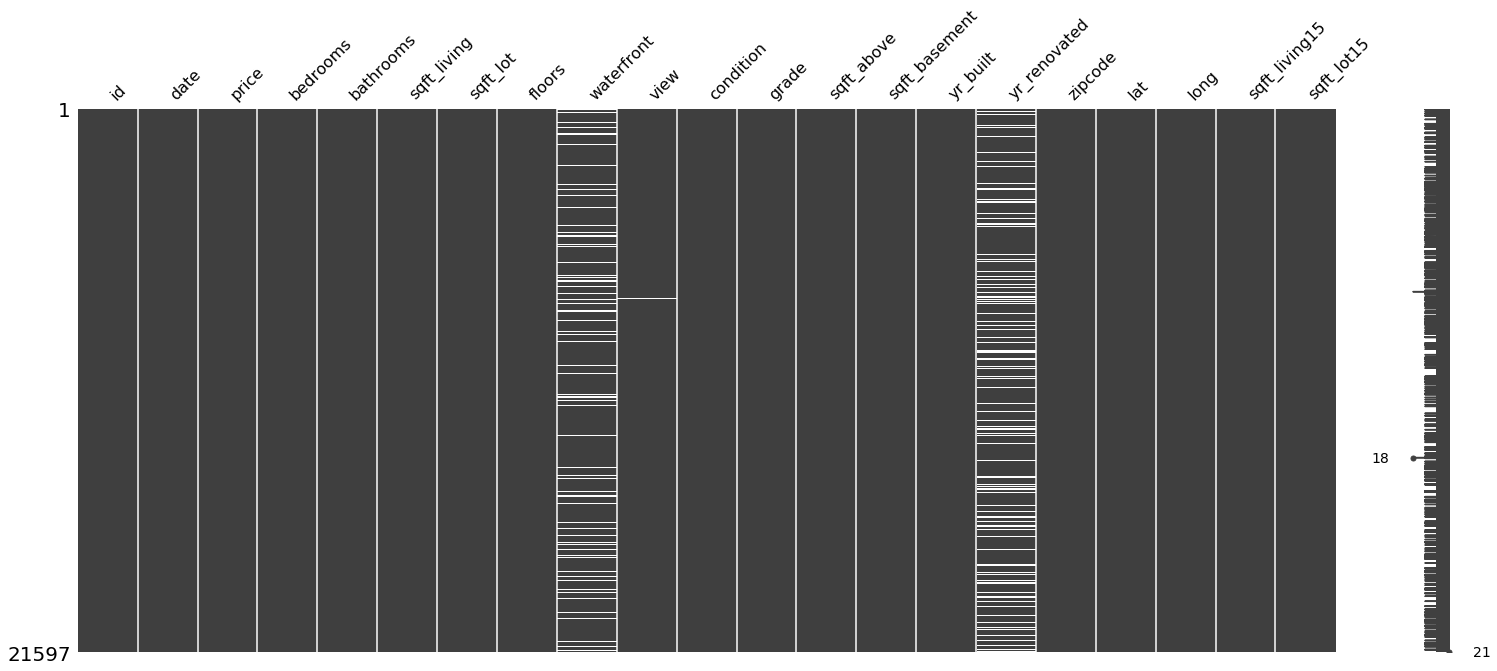

In [2]:
kc_csv = pd.read_csv('./data/kc_house_data.csv')
kcdf = pd.DataFrame(kc_csv)
msno.matrix(kcdf)

### Replace Values
Based on our EDA, we discovered that the ```sqft_basement``` column had '?' values that we'll need to replace with NAN values and drop those rows.

In [3]:
columns_to_replace = ['sqft_basement']
replace_column_w_nan(kcdf, columns_to_replace, '?')

Replaced ? values from these columns:['sqft_basement']


### Drop Rows
Our matrix shows that the ```view``` column has a view missing values, and our EDA confirms that .29% of values are missing.
Because that is so small, we can drop the NA rows without significantly affecting the data.
We're also dropping the replacement NAN values from the ```sqft_basement``` column.

In [4]:
columns_with_na = ['view', 'sqft_basement']
drop_na_rows(kcdf, columns_with_na)

Removed NA rows from these columns:['view', 'sqft_basement'].


### Drop Columns

The matrix shows significant missing values for the 
```waterfront``` and ```yr_renovated``` columns, and our EDA confirms that 11% and 17.79% (respectively) of the values are missing. 
Because that is a significant amount of data, we'll choose to drop those columns.

In [5]:
living, basement, above = kcdf.sqft_living.astype(float), kcdf.sqft_basement.astype(float), kcdf.sqft_above.astype(float)
num_of_rows_where_true = (living == basement + above).sum()
num_of_rows_where_true == kcdf.shape[0]

True

Additionally, we calculated that 
```sqft_above + sqft_basement == sqft_living``` 
so we can drop those columns to reduce noise.

On the other hand these columns are relatively equivalent
```lat + long ≈ zipcode```, 
so we can drop those 2 columns to reduce noise as well. 

So we add each column to the list of 'columns_to_drop' and drop those columns.

In [6]:
columns_to_drop = ['waterfront', 'yr_renovated','sqft_above','sqft_basement','lat','long']
drop_columns(kcdf, columns_to_drop)

Dropped these columns:['waterfront', 'yr_renovated', 'sqft_above', 'sqft_basement', 'lat', 'long']


### Extra Checks
In case we need to run any analysis on the string values, we want to sanitize those values by removing all leading/trailing spaces.

In [7]:
strip_spaces(kcdf)

stripped leading/trailing spaces from all cells of string type


And we also want to run a quick check for duplicates.

In [8]:
check_duplicates(kcdf)

You're all clear of duplicates


### Review Part 1

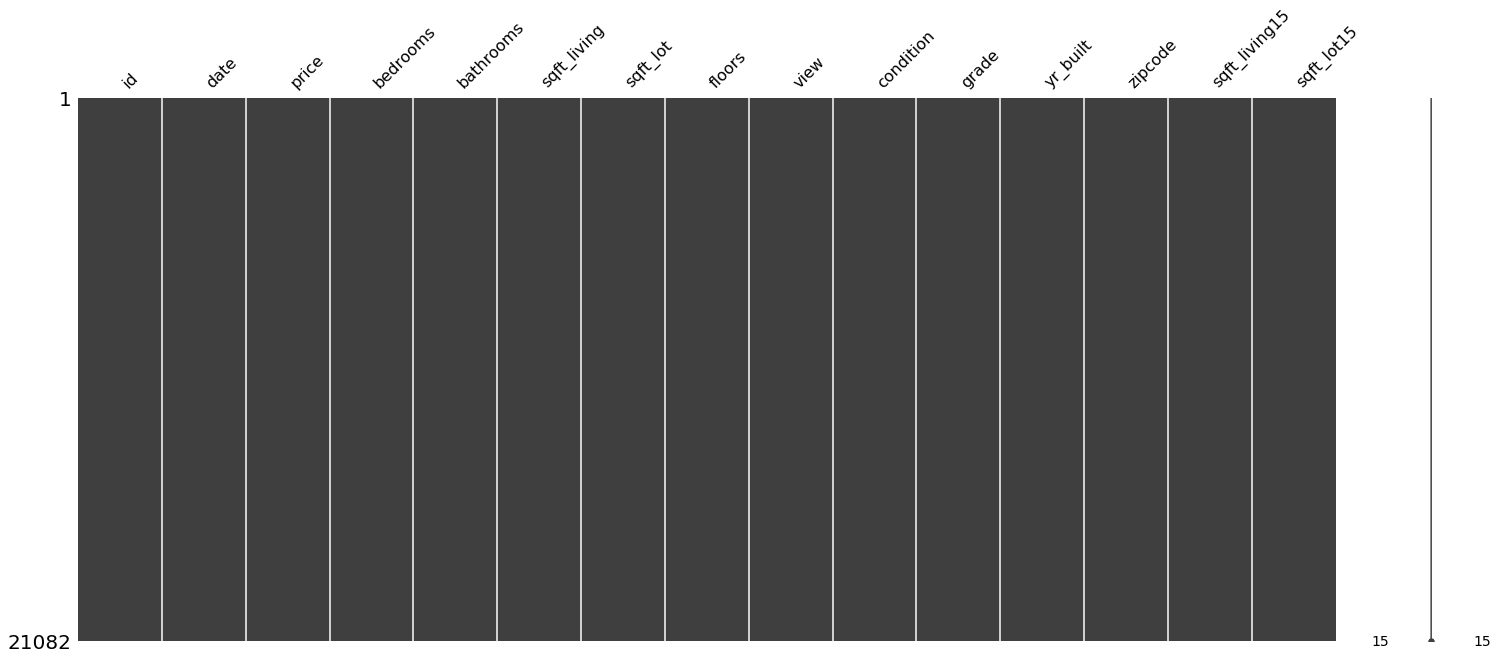

In [9]:
msno.matrix(kcdf)

Our matrix visually confirms that there are no more missing values in our data.

# Data Cleaning pt.2

Now that our data has been sufficiently cleaned of missing values, we can begin to calculate potential outliers.

In [10]:
kcdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
count,2.108200e+04,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,4.582793e+09,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,0.233327,3.409828,7.657717,1971.023337,98077.858837,1986.917418,12732.514135
std,2.876423e+09,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,0.765066,0.650597,1.173690,29.323120,53.528769,685.544250,27148.781580
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,0.000000,1.000000,3.000000,1900.000000,98001.000000,399.000000,651.000000
25%,2.123700e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,3.000000,7.000000,1952.000000,98033.000000,1490.000000,5100.000000
50%,3.904970e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,3.000000,7.000000,1975.000000,98065.000000,1840.000000,7626.000000
75%,7.312200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,0.000000,4.000000,8.000000,1997.000000,98117.000000,2360.000000,10088.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,4.000000,5.000000,13.000000,2015.000000,98199.000000,6210.000000,871200.000000


We determined that the most important columns with outliers to address are 'bathrooms' and 'bedrooms'.

In [11]:
columns_with_outliers = ['bathrooms', 'bedrooms']

We will calculate the absolute z-score for each cell in both columns

If a z-score is above 3, then we consider it an outlier and will remove it.

In [12]:
kcdf = remove_outliers(kcdf, columns_with_outliers)

Removed outliers from these columns:['bathrooms', 'bedrooms']


# Finale

And finally we can take our fully cleaned data and pickle it for futher analysis.

In [13]:
pickled_KC= pd.to_pickle(kcdf, './data/cleaned_KC.pkl')

In [14]:
cleaned_KC = pd.read_pickle('./data/cleaned_KC.pkl')

In [15]:
cleaned_KC.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,1800,7503
